## **Exploratory Data Analysis**

In [816]:
!gdown --id 1aha7-0efwTEMMK3fyY1WbGbV9tp-6ldf

Downloading...
From: https://drive.google.com/uc?id=1aha7-0efwTEMMK3fyY1WbGbV9tp-6ldf
To: /content/data.csv
100% 527k/527k [00:00<00:00, 3.95MB/s]


In [817]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [818]:
df = pd.read_csv('data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2056,2014-06-06 00:00:00,160000.0,3.0,1.0,1210,103237,1.0,0,0,2,1210,0,1918,1960,20505 Vashon Ave,Vashon,WA 98070,USA
2843,2014-06-19 00:00:00,720000.0,4.0,2.5,2440,34290,2.0,0,0,3,2440,0,1987,2000,7210 221st Ave NE,Redmond,WA 98053,USA
4247,2014-07-09 00:00:00,359000.0,3.0,1.5,1550,4980,1.0,0,0,3,1080,470,1978,0,10304 Interlake Ave N,Seattle,WA 98133,USA
2316,2014-06-11 00:00:00,785000.0,3.0,3.5,4500,21870,2.0,0,0,3,4500,0,2004,2003,13528 SE 333rd Pl,Auburn,WA 98092,USA
4412,2014-05-22 00:00:00,0.0,3.0,3.0,1860,7440,1.0,0,0,5,1040,820,1954,0,10744 62nd Ave S,Seattle,WA 98178,USA


In [819]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [820]:
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [821]:
df.floors.value_counts()

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

In [822]:
df.waterfront.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [823]:
df.view.value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [824]:
df.condition.value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [825]:
df = df.drop(columns=['country', 'statezip', 'street', 'city'], axis=1)

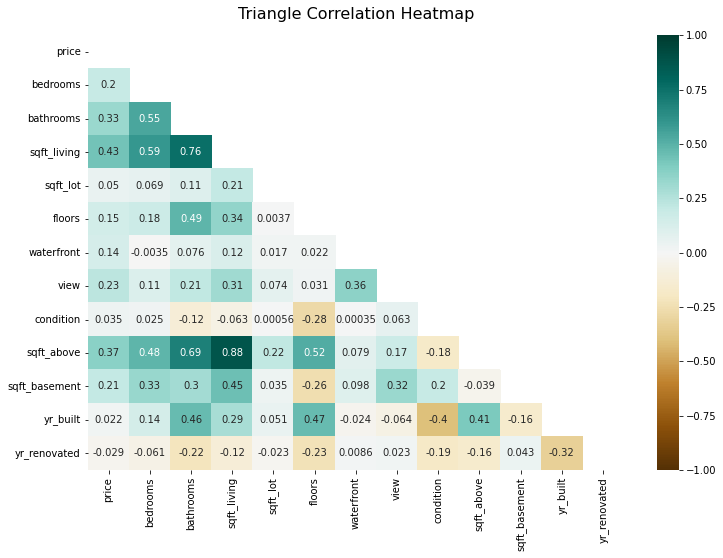

In [826]:
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':16}, pad=16);

In [827]:
continous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
categorical = ['yr_renovated', 'yr_built', 'floors', 'bathrooms', 'date']

## **Data Preprocessing**

In [828]:
scaler = MinMaxScaler()
df[continous] = scaler.fit_transform(df[continous].values)

In [829]:
le = LabelEncoder()

for cat in categorical:
    df[cat] = le.fit_transform(df[cat])

In [830]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0,0.011771,3.0,4,0.073652,0.006775,1,0,0,3,0.107301,0.000000,55,50
1,0,0.089658,5.0,8,0.249051,0.007835,2,0,4,5,0.331858,0.058091,21,0
2,0,0.012862,3.0,6,0.118451,0.010534,0,0,0,4,0.172566,0.000000,66,0
3,0,0.015795,3.0,7,0.123766,0.006885,0,0,0,4,0.069690,0.207469,63,0
4,0,0.020684,4.0,8,0.119210,0.009186,0,0,0,4,0.085177,0.165975,76,37


## **Modelling**

In [831]:
x_train = df.drop(columns=['price'])
y_train = df['price']

In [837]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor

In [842]:
lr = LinearRegression()
lr.fit(x_train, y_train)

regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

## **Evaluation**

In [843]:
def result(model, df):
    df_prediction = df.drop(columns=['price'], axis=1)
    prediction = model.predict(df_prediction) 

    plt.figure(figsize=(12, 6))
    plt.plot(df['price'], label="Actual", color="black")
    plt.plot(prediction, label="Predict", color="red")
    plt.legend()
    plt.show()

    print("\nMAE  :", round(mean_absolute_error(df['price'], prediction), 4))
    print("MSE  :",  round(mean_squared_error(df['price'], prediction),4))
    print("RMSE :",  round(math.sqrt(mean_squared_error(df['price'], prediction)), 4))
    print("R2   :",  round(math.sqrt(r2_score(df['price'], prediction)), 4))

    df_result = pd.DataFrame({'Price': df['price'], 'Predicted Price' : prediction})
    print("\n", df_result.head(10))

### **Linear Regression**

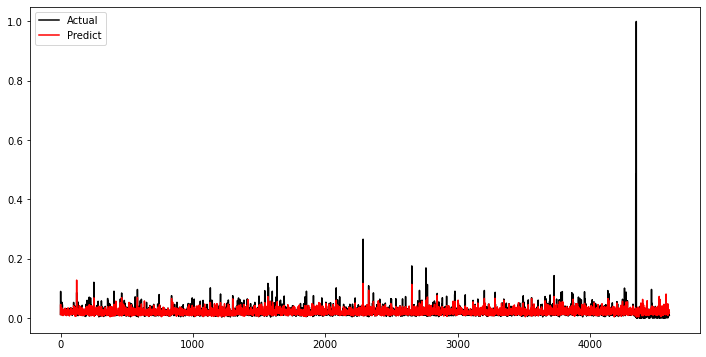


MAE  : 0.0064
MSE  : 0.0004
RMSE : 0.0187
R2   : 0.4671

       Price  Predicted Price
0  0.011771         0.012998
1  0.089658         0.045593
2  0.012862         0.018627
3  0.015795         0.019133
4  0.020684         0.016404
5  0.018428         0.010233
6  0.012599         0.013246
7  0.018127         0.022776
8  0.017018         0.020029
9  0.024069         0.014683


In [844]:
result(lr, df)

### **Random Forest Regression**

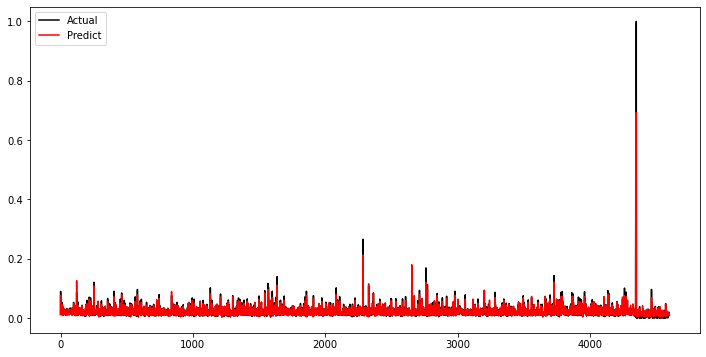


MAE  : 0.0025
MSE  : 0.0
RMSE : 0.0067
R2   : 0.9493

       Price  Predicted Price
0  0.011771         0.013583
1  0.089658         0.076250
2  0.012862         0.013498
3  0.015795         0.015983
4  0.020684         0.018360
5  0.018428         0.016347
6  0.012599         0.013337
7  0.018127         0.019719
8  0.017018         0.017793
9  0.024069         0.019375


In [845]:
result(regr, df)